# COMP-2704: Supervised Machine Learning
### <span style="color:blue"> Week 3 </span>

![cartoon](cartoon3.png)

## <span style="color:blue"> Chapter 3: Drawing a line closer to our points: linear regression </span>

In [1]:
# import necessary functions
from matplotlib import pyplot as plt
import numpy as np
import turicreate as tc

Consider a set of data as given below, where $x$ is the only feature, and $y$ is the label.

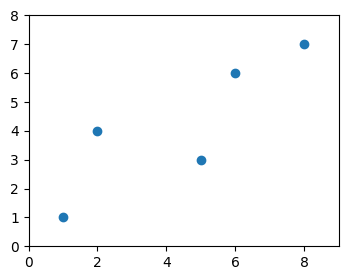

In [2]:
# create x, y data similar to Fig. 3.1
x = [1, 2, 5, 6, 8]
y = [1, 4, 3, 6, 7]

# plot the data
plt.figure(figsize=(4, 3))
plt.xlim([0,9])
plt.ylim([0,8])
plt.plot(x,y, linestyle='', marker = 'o', )
plt.show()

**<span style="color:green">Q: What are some examples of what $x$ and $y$ might represent?</span>**  
The goal of linear regression is to draw a line that comes as close as possible to all of the points.

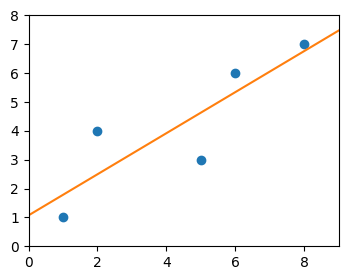

In [3]:
# use numpy to find slope and y-intercept of best fit line
m, b = np.polyfit(x, y, 1)

# create 100 x points for plotting line
line_x = np.linspace(0, 9, 100)
# find the corresponding y values using slope and y-intercept found above
line_y = b + m * line_x

# plot the line with the points
plt.figure(figsize=(4, 3))
plt.xlim([0,9])
plt.ylim([0,8])
plt.plot(x,y, linestyle='', marker = 'o')
plt.plot(line_x, line_y)
plt.show()

* Using the equation for the line, we can now predict the $y$-value for any given $x$.  
* The predicition can only be trusted for $x$ values that are similar to those found in the dataset.  

**<span style="color:green">Q: What $y$-value would you predict for $x=3$?</span>**

In [4]:
# calculate y-value for x=3
y_hat = m*3 + b
print('If x = 3 we predict y =', y_hat)

If x = 3 we predict y = 3.204819277108433


* Notice this point is on the line.  
* This is what we mean by *using the line to make predictions*.  
* Of course the prediction will not be perfect.  
* The error of the model tells us the uncertainty in our predictions. More on this later.

### The problem: We need to predict the price of a house
* Consider that you are realtor and would like a tool to help assess house values.
* You need a regression model for house prices.

**<span style="color:green">Q: What features would you use in this model?</span>**

* Let us first consider a simple model with only one feature: number of rooms.
* Say we have the dataset shown below.

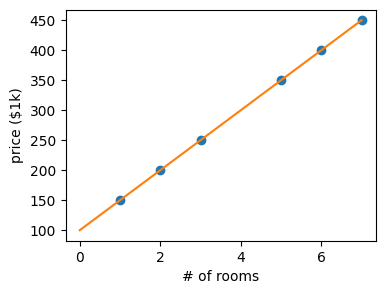

In [5]:
# hard-code some data
rooms = [1, 2, 3, 5, 6, 7]
price = [150, 200, 250, 350, 400, 450]

# create a dictionary holding the data
datadict = {
    'rooms': rooms,
    'price ($1k)'  : price,
}

# convert the dictionary into an SFrame
data = tc.SFrame(datadict)

# fix the column order and display SFrame
column_names = data.column_names()
column_names.sort(reverse = True)
data = data[column_names]
data

# create a plot
plt.figure(figsize=(4, 3))
plt.plot(rooms, price, marker='o', linestyle='')
plt.xlabel('# of rooms')
plt.ylabel('price ($1k)')
# use numpy to find slope and y-intercept of best fit line
m, b = np.polyfit(rooms, price, 1)

# create 100 x points for plotting line
line_x = np.linspace(0, 7, 100)
# find the corresponding y values using slope and y-intercept found above
line_y = b + m * line_x

# plot the line 
plt.plot(line_x, line_y)
plt.show()

**<span style="color:green">Q: What would you predict for the price of a four bedroom house?</span>**  
**<span style="color:green">Q: What equation did you use?</span>**

$
\begin{eqnarray}
\text{price prediction} &=& 100 + 50 (\text{# of rooms}) \\
             &=& 100 + 50 (4) \\
             &=& 300
\end{eqnarray}
$
* The equation above is a model.  
* Notice the prediction falls on the line.
* The number $50$ is the *weight* we are using for the # of rooms. Notice this is the slope of a line.
* The number $100$ is the *bias*. Here it represents the price of a house with no rooms. Notice this is the y-intercept.
* Let's review some definitions:  
**features**: The model inputs.  
**labels**: The model outputs.  
**model**: A rule for predicting labels from features.  
**prediction**: Guessing the label for given features.   
**weight**: a multiplication factor for a feature.  
**bias** an additive factor for the model; not associated with a feature.  

Now, how can we find the formula if the data is not perfectly linear? Consider the more realistic dataset below:

rooms,price ($1k)
1,155
2,197
3,244
5,356
6,407
7,448


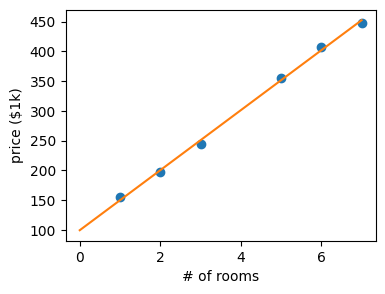

In [6]:
# hard-code some data
rooms = [1, 2, 3, 5, 6, 7]
price = [155, 197, 244, 356, 407, 448]

# create a dictionary holding the data
datadict = {
    'rooms': rooms,
    'price ($1k)'  : price,
}

# convert the dictionary into an SFrame
data = tc.SFrame(datadict)

# fix the column order and display SFrame
column_names = data.column_names()
column_names.sort(reverse = True)
data = data[column_names]
display(data)

# create a plot
plt.figure(figsize=(4, 3))
plt.plot(rooms, price, marker='o', linestyle='')
plt.xlabel('# of rooms')
plt.ylabel('price ($1k)')

# use numpy to find slope and y-intercept of best fit line
weight, bias = np.polyfit(rooms, price, 1)

# create 100 x points for plotting line
line_x = np.linspace(0, 7, 100)
# find the corresponding y values using slope and y-intercept found above
line_y = bias + weight * line_x

# plot the line 
plt.plot(line_x, line_y)
plt.show()

* With this new data, numpy has found a best fit line with new *parameters* (the weight and bias).

In [7]:
print("Bias =", bias)
print("Weight for # of rooms =", weight)

Bias = 99.5952380952382
Weight for # of rooms = 50.39285714285712


* This is technically a different model than we had before, because the weight and bias are different.
* We see that the line does not pass through all of the data points. Predictions are always on the line. 
* The model will make a small error for predicting any of the known values.  
* The weight and bias are found to keep the errors small over the entire dataset.
* Using the new model, we predict the price of a four-room house below.

In [8]:
price_prediction = bias + weight*4
print('The predicted price of a four-room house is $', round(price_prediction), 'k.', sep='')

The predicted price of a four-room house is $301k.


What if we have more features? This is known as *multivariate linear regression*.  
* Each feature will have an associated weight.
* There is still only one bias.
* It is no longer possible to create a 2d plot to represent the data and model.  
* The model equation is of the form $\hat{y} = b + w_1 x_1 + w_2 x_2 + \cdots + w_n x_n$.  
* For example, consider as features: # of rooms, size, school quality, and house age. After training, we might obtain a model such as:  
$$ \text{price prediction} = 50 + 30(\text{# of rooms}) + 1.5(\text{size}) + 10(\text{school quality}) - 2(\text{house age}) $$  
<br>
* Features that add to house value will have positive weights. Features that reduce the house value will have negative weights.
* More important features will have weights with larger absolute values.

**<span style="color:green">Q: What weight would you expect to find for a feature that has no impact on the price?</span>**

### How do we find the model?  
* Let us return to the case where we consider only the number of rooms as a feature.
* Given a dataset, how do we find the line that fits?  

Here is pseudocode for a linear regression algorithm:  
* *Input*: a dataset with prices and number of rooms for many houses.  
* *Output*: the equation of a line.  
* *Procedure*:
    * Pick a random line by choosing random values for weight and bias.
    * Loop:  
         * Pick a random point from the dataset.
         * Predict the price.
         * Move the line closer to that point by chaning weight and bias.
    * Return the weight and bias when loop is finished.

<br>
<img src='Fig3.6.png' width='600'/>
<br>

How much should we move the line?
* Just a little bit.
* If we move the line to go through one point, it will miss badly the other points.
* If we move the line too much, it will make big jumps every time we process a new point, and will never settle down on a single line of best fit.
* We use a small number called the **learning rate** $\eta \ll 1$ to control the size of the adjustments.

But how do we move the line $\hat{y} = mx + b$ closer to a point?  
* We adjust the slope (weight) and y-intercept (bias) of a line.
* *<span style="color:red">Navigate to the "Changing parameters in linear regression" GeoGebra app in the Week 3 module of the course website.</span>*

Adjusting the slope $m$:
* increasing $m$ rotates the line counterclockwise about the y-intercept
* decreasing $m$ rotates the line clockwise about the y-intercept

Adjusting the bias $b$:
* increasing $b$ shifts the line up
* decreasing $b$ shifts the line down

<br>
<img src='Fig3.9.png' width='600'/>
<br>

Let's consider a simple way of moving the line closer to a point. There are four cases to consider.

<br>
<img src='Fig3.11.png' width='600'/>
<br>

Let's write this into a function called 'simple_trick'. Here is the pseudocode:  
* *Input*: $(x, y)$ coordinates of a point; slope $m$ and y-intercept $b$ of a line; learning rates $\eta_m$ and $\eta_b$ for each parameter.
* *Output*: updated slope $m$ and y-intercept $b$.
* *Procedure*:
    * Calculate $\hat{y} = mx +b$.
    * Case 1 ($x \ge 0$, $y \ge \hat{y}$):  
        * set $m = m + \eta_m$
        * set $b = b + \eta_b$
    * Case 2 ($x < 0$, $y \ge \hat{y}$):
        * set $m = m - \eta_m$
        * set $b = b + \eta_b$
    * Case 3 ($x \ge 0$, $y < \hat{y}$):
        * set $m = m - \eta_m$
        * set $b = b - \eta_b$
    * Case 4 ($x < 0$, $y < \hat{y}$):
        * set $m = m + \eta_m$
        * set $b = b - \eta_b$
    * Return $m$ and $b$
    
**<span style="color:green">Q: Can you complete the code in the next cell?</span>**

Even though the feature we are looking at (number of rooms) must be bigger than or equal to 1, write the function so that it will work for any $x \in (-\infty, \infty)$.

In [9]:
def simple_trick(m, b, x, y, eta_m = 0.01, eta_b = 0.01):
    # write code here
    return m, b

Now, test the code using the next cell. Be sure to try all four cases, as well as points on the line for positive and negative values of $x$, and $x = 0$. 

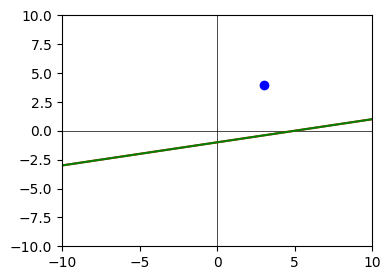

In [10]:
# create a point for testing
x = 3
y = 4

# create a line for testing
m = 0.2
b = -1

# create 100 x-points for plotting line
line_x = np.linspace(-10, 10, 100)

# find the corresponding y-values using slope and y-intercept found above
line_y = b + m * line_x

# setup a plot
plt.figure(figsize=(4, 3))
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axhline(y=0, color="black", linewidth=0.5)
plt.axvline(x=0, color="black", linewidth=0.5)

# plot the point in blue and the original line in red
plt.plot(x, y, marker='o', color='blue')
plt.plot(line_x, line_y, color='red')

# run the function
m, b = simple_trick(m, b, x, y, eta_m = 0.01, eta_b = 0.01)

# calculate new y-values
line_y = b + m * line_x

# plot the new line in green
plt.plot(line_x, line_y, color='green')
plt.show()